## [reference](https://towardsdatascience.com/how-to-forecast-sales-with-python-using-sarima-model-ba600992fa7d)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
products = pd.read_csv('../data/products_data/sample_products.csv')
products

,productid,title,subtitle,price,description,avg rating,no of ratings,style,sleeve,color,print,fit,material,similar
0,1,HRX by Hrithik Roshan,Men Teal Blue Printed T-shirt,454,This season set a sporty fashion trend with th...,4.3,18600,Round Neck,Short Sleeves,Teal,Geometric,Regular,100% cotton Machine-wash,2


In [3]:
reviews = pd.read_csv('../data/reviews_data/sample_reviews.csv')
reviews

,productid,reviewtext,rating
0,1,All is okay. But if the printed colour is more...,4


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = products.iloc[0]['description']
doc = nlp(text)
print(doc.ents)

(This season, the HRX Men's Athleisure T-shirt)


In [5]:
from collections import Counter
from string import punctuation
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

In [6]:
keywords = set(get_hotwords(products.iloc[0]['description']))
keywords

{'athleisure',
 'casual',
 'fashion',
 'hoodie',
 'hrx',
 'jacket',
 'men',
 'season',
 'shirt',
 'sporty',
 't',
 'trend'}

In [7]:
import nltk
words = set(nltk.corpus.words.words())

f = lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words)
res = map(f,keywords)
res = set(res)
res

{'',
 'casual',
 'fashion',
 'hoodie',
 'jacket',
 'men',
 'season',
 'shirt',
 'sporty',
 't',
 'trend'}

In [8]:
keywords = set(get_hotwords(reviews.iloc[0]['reviewtext']))
reviewkeys = set(map(f,keywords))
reviewkeys = [x for x in reviewkeys if x and len(x)>1]
reviewkeys

['perfect', 'happy', 'colour']

In [9]:
keywords = set(get_hotwords(products.iloc[0]['subtitle']))
subkeys = set(map(f,keywords))
subkeys = [x for x in subkeys if x and len(x)>1]
subkeys

['men', 'blue', 'shirt']

In [10]:
keywords = set(get_hotwords(products.iloc[0]['material']))
matkeys = set(map(f,keywords))
matkeys = [x for x in matkeys if x and len(x)>1]
matkeys

['cotton', 'wash', 'machine']

In [12]:
res = list(res) + reviewkeys + subkeys + matkeys + [products.iloc[0]['title'], products.iloc[0]['style'], products.iloc[0]['sleeve'], products.iloc[0]['color'], products.iloc[0]['print'], products.iloc[0]['fit']]
res = [x for x in res if x and len(x)>1]
res = set(res)

In [13]:
res

{'Geometric',
 'HRX by Hrithik Roshan',
 'Regular',
 'Round Neck',
 'Short Sleeves',
 'Teal',
 'blue',
 'casual',
 'colour',
 'cotton',
 'fashion',
 'happy',
 'hoodie',
 'jacket',
 'machine',
 'men',
 'perfect',
 'season',
 'shirt',
 'sporty',
 'trend',
 'wash'}

In [15]:
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = list(res)[0:5]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='IN', gprop='')
data = pytrends.interest_over_time()
data

,hoodie,fashion,shirt,perfect,cotton,isPartial
date,,,,,,
2016-09-18,2,84,49,54,33,False
2016-09-25,1,82,52,53,32,False
2016-10-02,1,71,59,51,32,False
2016-10-09,1,72,55,53,33,False
2016-10-16,2,70,55,53,32,False
...,...,...,...,...,...,...
2021-08-15,6,48,87,40,45,False
2021-08-22,6,47,83,40,43,False
2021-08-29,7,48,84,37,43,False


In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

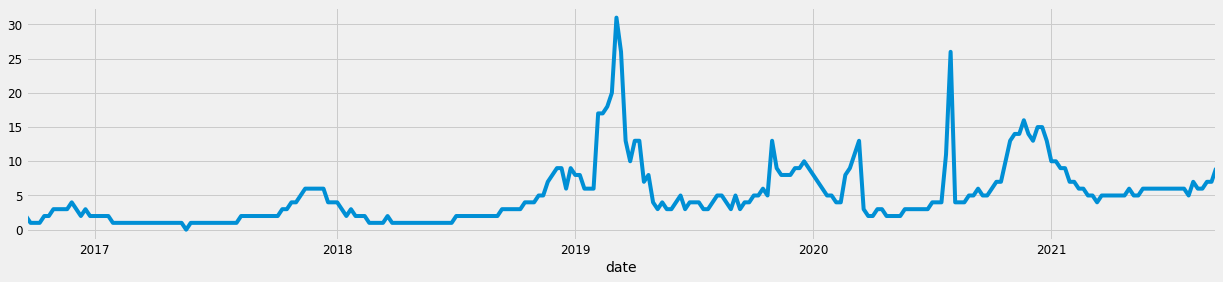

In [18]:
cas = data['hoodie']
cas.plot(figsize=(19, 4))
ema10 = cas.ewm(span=10).mean()
ema10.head(10)
plt.show()

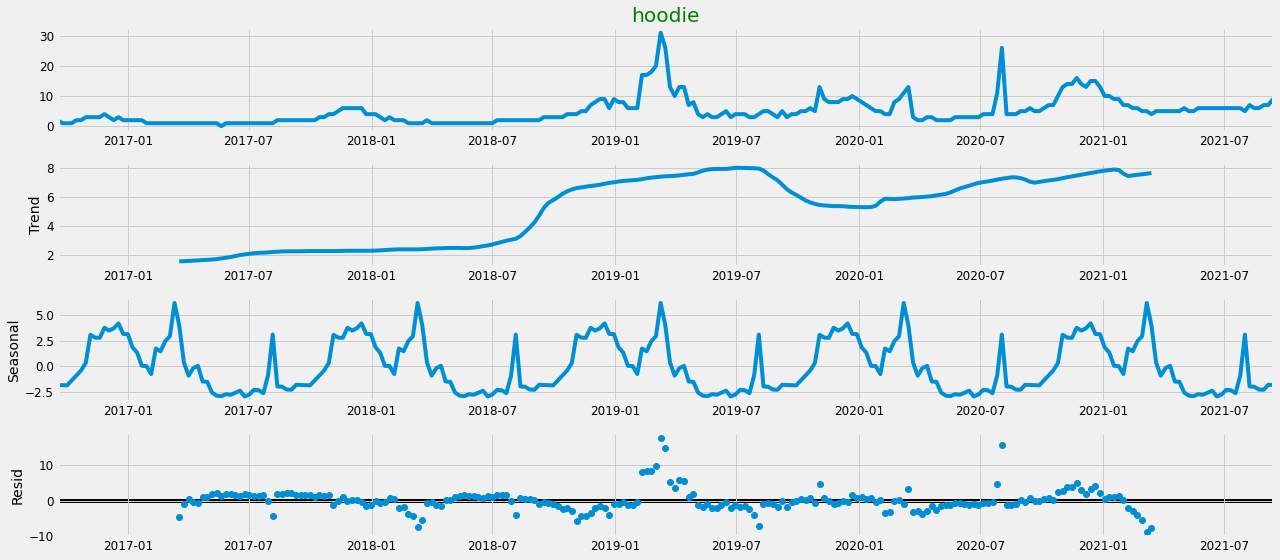

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(cas, model='additive')
fig = decomposition.plot()
plt.show()

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

In [22]:
mod = sm.tsa.statespace.SARIMAX(cas,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6433      0.030     21.214      0.000       0.584       0.703
ar.S.L12    3.711e-05      0.075      0.000      1.000      -0.147       0.147
ma.S.L12      -0.8177      0.065    -12.569      0.000      -0.945      -0.690
sigma2        11.4255      0.452     25.263      0.000      10.539      12.312


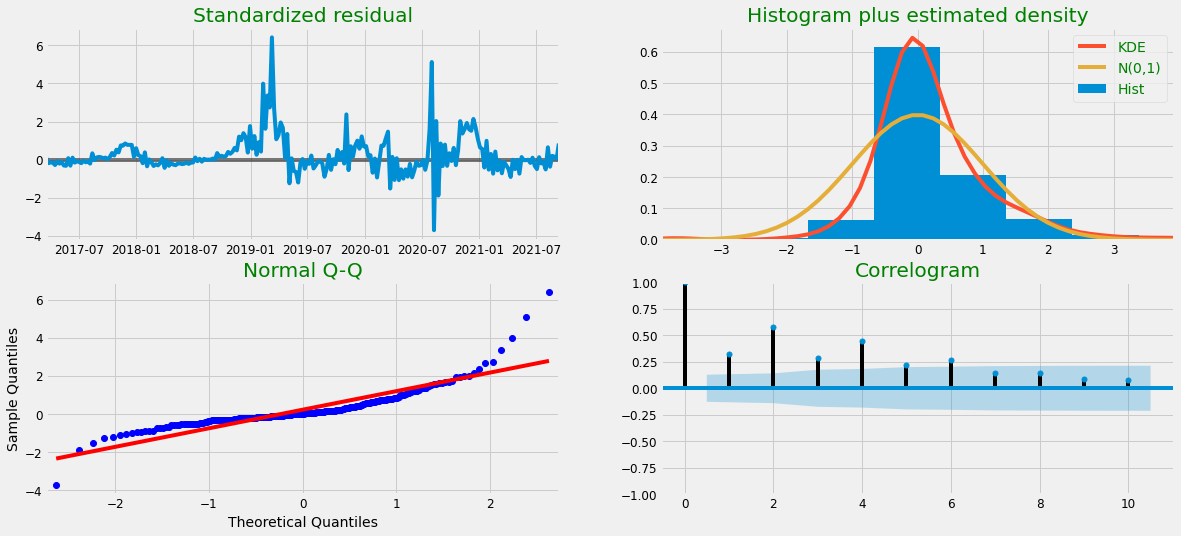

In [23]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2019-10-20'), dynamic=False)

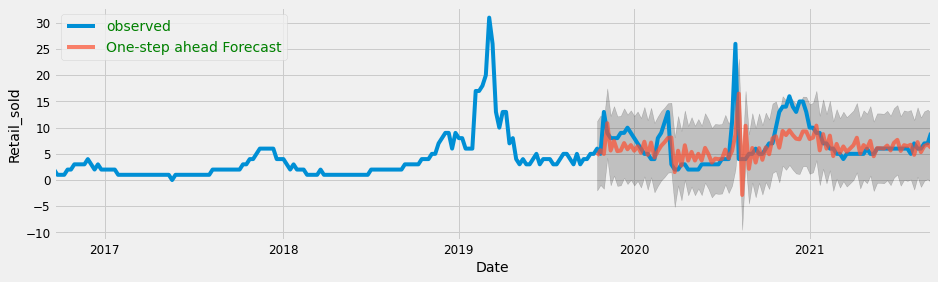

In [32]:
pred_ci = pred.conf_int()
ax = cas['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [34]:
y_forecasted = pred.predicted_mean
y_truth = cas['2018-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 12.75
The Root Mean Squared Error is 3.57


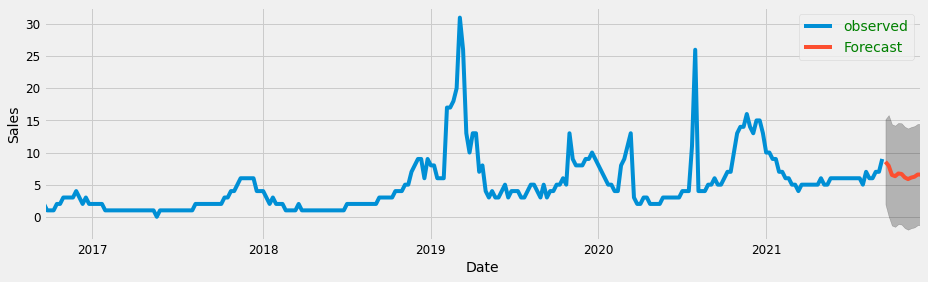

In [36]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = cas.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [37]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2019-10-20     4.654317
2019-10-27     5.692178
2019-11-03     4.971603
2019-11-10    10.849611
2019-11-17     5.628598
2019-11-24     7.474916
2019-12-01     5.522193
2019-12-08     5.627961
2019-12-15     7.058108
2019-12-22     5.872038
2019-12-29     6.673078
2020-01-05     5.595606
Freq: W-SUN, dtype: float64

In [38]:
y_truth.head(12)

date
2018-06-03    1
2018-06-10    1
2018-06-17    1
2018-06-24    1
2018-07-01    1
2018-07-08    2
2018-07-15    2
2018-07-22    2
2018-07-29    2
2018-08-05    2
2018-08-12    2
2018-08-19    2
Name: hoodie, dtype: int32

In [39]:
pred_ci.head(24)

,lower hoodie,upper hoodie
2021-09-19,1.932225,15.182686
2021-09-26,0.073640,15.829004
2021-10-03,-1.356193,14.399171
2021-10-10,-1.562929,14.192436
2021-10-17,-1.135088,14.620222
2021-10-24,-1.206715,14.548465
2021-10-31,-1.752779,14.002400
2021-11-07,-2.009356,13.745824
2021-11-14,-1.775597,13.979583
2021-11-21,-1.647748,14.107432


In [40]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2021-09-19    8.557455
2021-09-26    7.951322
2021-10-03    6.521489
2021-10-10    6.314754
2021-10-17    6.742567
2021-10-24    6.670875
2021-10-31    6.124811
2021-11-07    5.868234
2021-11-14    6.101993
2021-11-21    6.229842
2021-11-28    6.577996
2021-12-05    6.567724
Freq: W-SUN, dtype: float64